Architecture Klasifikasi dengan Pytorch, sesuai dengan pertnyaan yang diberikan.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter

class Delameta_klasifikasi(nn.Module):
    def __init__(self, num_classes=7):
        super(Delameta_klasifikasi, self).__init__()
        # Membuat Convolutional Layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        
        # Menentukan layer Full connected
        self.fc1 = nn.Linear(512 * 4 * 4, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        
        # Define dropout layer
        self.dropout = nn.Dropout()

    def forward(self, x):
        # Forward pass through convolutional layers
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Flatten the output for the fully connected layers, karena merupakan metode klasifikasi. Klasifikasi fully connected merupaka metode yang paling efisien.
        x = torch.flatten(x, 1)  # Flatten dimensi digunakan agar tidak mudah overfitting

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x


model = Delameta_klasifikasi()
print(model)



2024-03-04 14:34:59.690176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 14:35:00.296427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-04 14:35:00.296478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-04 14:35:00.296484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Delameta_klasifikasi(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Hal pertama yang dilakukan adalah melihat aturan yang diberikan, Pada data train yang diberikan tidak tersedia label atau anotation dengan format setiap file, misalkan mscoco dengan json. Pada data train yang diberikan ada label dengan nama file didepan tetapi pada test folder diberikan anotation pada masing-masing folder yang diberikan sehingga pada training classes mengikuti test classes, sehingga perlu dilakukan pengelompokan folder sehingga mudah dilakukan training. Berikut python code untuk training folder dan dihasilkan 8 classes.

In [ ]:
import os
import shutil

def organize_files(source_folder):
    files = os.listdir(source_folder)
    car_brands = ['hyundai', 'volkswagen', 'lexus', 'mazda', 'opel', 'toyota', 'mercedes']
    for brand in car_brands:
        os.makedirs(os.path.join(source_folder, brand), exist_ok=True)

    for file_name in files:
        brand_name = file_name.split('_')[0]
        if brand_name == 'mercy' or brand_name == 'mercedes':
            brand_name = 'mercedes' 
        shutil.move(
            os.path.join(source_folder, file_name),
            os.path.join(source_folder, brand_name, file_name)
        )

    print("Files organized successfully!")

if __name__ == "__main__":
    source_folder = input("Masukkan path: ")
    organize_files(source_folder)


In [78]:
import os
from pathlib import Path
path_traindata = '/home/arjuna/Documents/Delameta/Train'
batch_size = 64
def membuka(dir_path):
 
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

membuka(path_traindata)
train_loader = torch.utils.data.DataLoader(path_traindata, batch_size=batch_size, shuffle=True, num_workers=2)
print("Jumlah Epoch Training: ", len(train_loader)*batch_size)

path_testdata = '/home/arjuna/Documents/Delameta/Test'
test_loader = torch.utils.data.DataLoader(path_testdata, batch_size=batch_size, shuffle=False, num_workers=2)
print("The number of images in a test set is: ", len(test_loader)*batch_size)

print("The number of batches per epoch is: ", len(train_loader))
classes = ('hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'toyota', 'fvolkswagen')
           
def membuka(dir_path):
 
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

membuka(path_testdata)

There are 7 directories and 0 images in '/home/arjuna/Documents/Delameta/Train'.
There are 0 directories and 290 images in '/home/arjuna/Documents/Delameta/Train/lexus'.
There are 0 directories and 181 images in '/home/arjuna/Documents/Delameta/Train/mercedes'.
There are 0 directories and 66 images in '/home/arjuna/Documents/Delameta/Train/toyota'.
There are 0 directories and 160 images in '/home/arjuna/Documents/Delameta/Train/opel'.
There are 0 directories and 279 images in '/home/arjuna/Documents/Delameta/Train/mazda'.
There are 0 directories and 62 images in '/home/arjuna/Documents/Delameta/Train/volkswagen'.
There are 0 directories and 300 images in '/home/arjuna/Documents/Delameta/Train/hyundai'.
Jumlah Epoch Training:  64
The number of images in a test set is:  64
The number of batches per epoch is:  1
There are 7 directories and 0 images in '/home/arjuna/Documents/Delameta/Test'.
There are 0 directories and 47 images in '/home/arjuna/Documents/Delameta/Test/lexus'.
There are 0 

In [ ]:
# Install torchinfo if it's not available, import it if it is

import torchinfo
    
from torchinfo import summary
summary(model, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

In [79]:
from torch.optim import Adam
 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
train_data = datasets.ImageFolder('/home/arjuna/Documents/Delameta/Train', transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = datasets.ImageFolder('/home/arjuna/Documents/Delameta/Test', transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)


In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),         
])


model = Delameta_klasifikasi().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
writer = SummaryWriter()

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  

        # Move tensors to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    # Print the average loss per epoch
    epoch_loss = running_loss / len(train_data)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Write the loss to TensorBoard
    writer.add_scalar('Training Loss', epoch_loss, epoch)

# Close the TensorBoard writer
torch.save(model.state_dict(), 'Klasifikasi.pt')
writer.close()


In [80]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image


model = Delameta_klasifikasi()
model.load_state_dict(torch.load('/home/arjuna/Documents/Delameta/32/Klasifikasi.pt'))
model.eval()

def predict_image(image_path, model, transform):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(image)
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Example usage:
image_path = '/home/arjuna/Documents/Delameta/Test/mazda/15.jpg'
predicted_label = predict_image(image_path, model, transform)
print(f"Predicted label: {predicted_label}")


Predicted label: 2


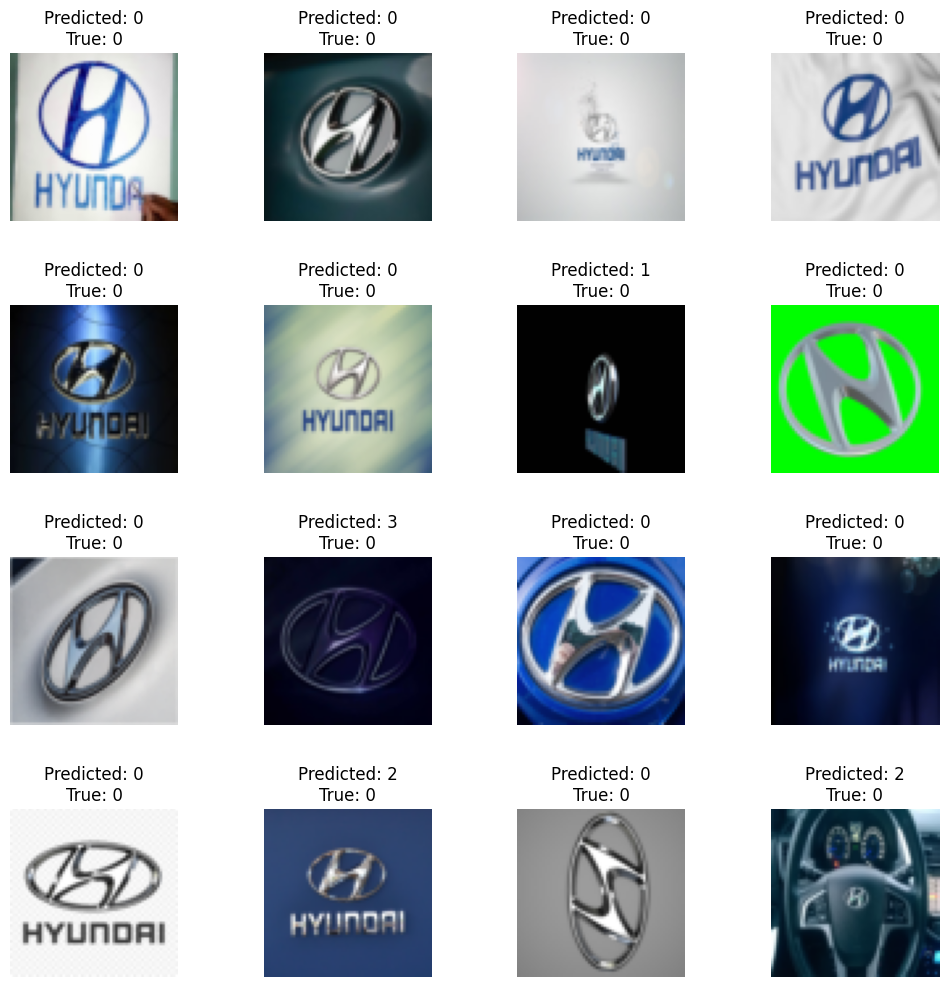

In [81]:
import os
import matplotlib.pyplot as plt

# Define the function to display image predictions with a grid
def display_image_predictions(test_data, model, transform, num_images=16, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    # Iterate over a subset of images from the test dataset
    for i in range(num_images):
        image_path, true_label = test_data.samples[i]
        image = Image.open(image_path)
        image = transform(image)  # Apply the transformation

        # Perform inference
        predicted_label = predict_image(image_path, model, transform)

        # Plot the image and predicted label
        ax = axes[i // cols, i % cols]
        ax.imshow(image.permute(1, 2, 0))
        ax.set_title(f'Predicted: {predicted_label}\nTrue: {true_label}')
        ax.axis('off')

    plt.show()

# Display image predictions
display_image_predictions(test_data, model, transform)


In [82]:
correct = 0
total = 0
net = Delameta_klasifikasi()
net.load_state_dict(torch.load('Klasifikasi.pt'))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 60 %


In [132]:
import torch.onnx

# Instantiate your model
model = Delameta_klasifikasi()

# Provide a sample input tensor
dummy_input = torch.randn(1, 3, 64, 64)  # Adjust the shape according to your input requirements

# Define the path to save the ONNX file
onnx_file_path = "Delameta_klasifikasi.onnx"

# Export the model to ONNX format
torch.onnx.export(model, dummy_input, onnx_file_path, verbose=True)

print(f"Model successfully exported to {onnx_file_path}")


Exported graph: graph(%input.1 : Float(1, 3, 64, 64, strides=[12288, 4096, 64, 1], requires_grad=0, device=cpu),
      %conv1.weight : Float(64, 3, 3, 3, strides=[27, 9, 3, 1], requires_grad=1, device=cpu),
      %conv1.bias : Float(64, strides=[1], requires_grad=1, device=cpu),
      %conv2.weight : Float(128, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=1, device=cpu),
      %conv2.bias : Float(128, strides=[1], requires_grad=1, device=cpu),
      %conv3.weight : Float(256, 128, 3, 3, strides=[1152, 9, 3, 1], requires_grad=1, device=cpu),
      %conv3.bias : Float(256, strides=[1], requires_grad=1, device=cpu),
      %conv4.weight : Float(256, 256, 3, 3, strides=[2304, 9, 3, 1], requires_grad=1, device=cpu),
      %conv4.bias : Float(256, strides=[1], requires_grad=1, device=cpu),
      %conv5.weight : Float(512, 256, 3, 3, strides=[2304, 9, 3, 1], requires_grad=1, device=cpu),
      %conv5.bias : Float(512, strides=[1], requires_grad=1, device=cpu),
      %conv6.weight : Float(51

In [133]:
import onnx
onnx_model = onnx.load("Delameta_klasifikasi.onnx")
onnx.checker.check_model(onnx_model)

RuntimeError: output with shape [1, 64, 64] doesn't match the broadcast shape [3, 64, 64]

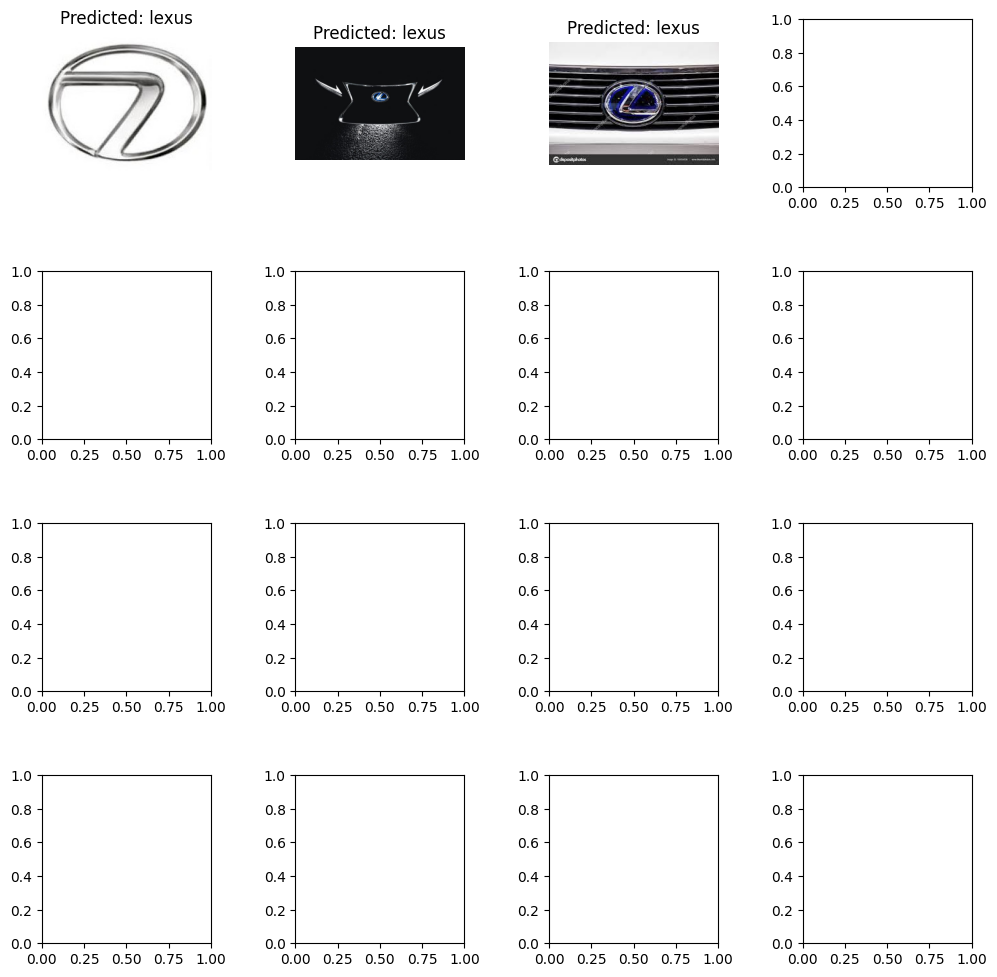

In [168]:
import os
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Load your ONNX model
onnx_model_path = '/home/arjuna/Documents/Delameta/Delameta_klasifikasi.onnx'
ort_session = onnxruntime.InferenceSession(onnx_model_path)

# Define the preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to match model's input size
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Define the function to predict image label
def predict_image(image_path, ort_session, transform):
    # Open the image file using PIL
    image = Image.open(image_path)

    # Apply preprocessing transformations
    image = transform(image)

    # Add a batch dimension
    image = image.unsqueeze(0)

    # Convert the preprocessed image to float32
    image_float32 = image.numpy().astype(np.float32)

    # Perform inference
    ort_inputs = {ort_session.get_inputs()[0].name: image_float32}
    ort_outs = ort_session.run(None, ort_inputs)

    # Assuming you have a list of class labels
    class_labels = ['hyundai', 'lexus', 'mazda', 'opel', 'toyota', 'mercedes', 'volkswagen']  # Replace with your class labels

    predicted_label_index = np.argmax(ort_outs[0])
    if predicted_label_index < len(class_labels):
        predicted_label = class_labels[predicted_label_index]
    else:
        predicted_label = 'Unknown'

    return predicted_label

# Define the function to display image predictions with a grid
def display_image_predictions(test_data_folder, ort_session, transform, num_images=16, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    # Get a list of image files from the test data folder
    image_files = [os.path.join(test_data_folder, file) for file in os.listdir(test_data_folder)][:num_images]

    # Iterate over the image files
    for i, image_path in enumerate(image_files):
        # Predict the label for the image
        predicted_label = predict_image(image_path, ort_session, transform)

        # Plot the image and predicted label
        ax = axes[i // cols, i % cols]
        ax.imshow(Image.open(image_path))
        ax.set_title(f'Predicted: {predicted_label}')
        ax.axis('off')

    plt.show()

# Example usage:
test_data_folder = '/home/arjuna/Documents/Delameta/Test/lexus'
display_image_predictions(test_data_folder, ort_session, preprocess)
